### INTRODUCTION

CUSTOMER RETENTION:  Telecom Churn Reduction,Predictive Analytics

__Business Problem__

Customer churn is when a customer stops using a service or product. It is a common and costly problem for telecom companies.  It directly affects revenue and long-term growth. Simple data analysis can highlight patterns, but it doesn’t capture the deeper signals behind why customers leave. That’s where machine learning comes in—it’s better at handling complex, real-world behavior.

In this project, we use customer usage data to predict churn for our business. We start with logistic regression for a quick baseline and then build on it with a decision tree to capture more nuance. The goal is to help our business act early, reduce churn, and keep their customers satisfied.


### Data Understanding

The **data source** for this analysis is from Kaggle - Churn in Telecoms Dataset. The dataset contains data on the customers of a Telecom company

The **target variable** is **churn**, which is binary—**True**(1) indicates the customer canceled their subscription-CHURNED, while **False** means they remained active- DID NOT CHURN(0).

#### Dataset Features:
- `Location`: state, area code
- `Customer Accounts`:account length, international plan, voice mail plan
- `Customer Behaviour`: total day/eve/night calls
- `Customer service interactions`: customer service calls


We will:
- Load the dataset
- EDA
- Do Business Analysis
- Model
- Give Recommendations


In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Churn_in_Telecom.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [32]:
# find missing values 
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

__Identifying Target, Categorical and Numeric Variables__

In [10]:
# Target Features

Target_features = 'churn'
print("Target Features:", Target_features)

Target Features: churn


In [34]:
# Categorical features
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)

print("Numerical Features:", numerical_features)

Categorical Features: ['state', 'phone number', 'international plan', 'voice mail plan', 'churn']
Numerical Features: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


In [35]:
#converting strings to integers
df = churn_df.copy()
df['churn'] = churn_df['churn'].astype(int)
df['international_plan'] = (churn_df['international plan'] == 'yes').astype(int)
df['voice_mail_plan'] = (churn_df['voice mail plan'] == 'yes').astype(int)

print(churn_df[['churn', 'international_plan', 'voice_mail_plan']].head())

   churn  international_plan  voice_mail_plan
0      0                   0                1
1      0                   0                1
2      0                   0                0
3      0                   1                0
4      0                   1                0


#### Exploratory data analysis

We will analyze the dataset to understand the structure and patterns in our dataset. This includes:

- Class imbalance (churn vs. non-churn)

- Key trends (e.g., do customers with international plans churn more?)

- Feature correlations with churn.

__Churn Distribution__

This helps us know the churning rate. What percentage of customers churned

In [36]:
# checking class imbalance

df['churn'].value_counts(normalize=True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

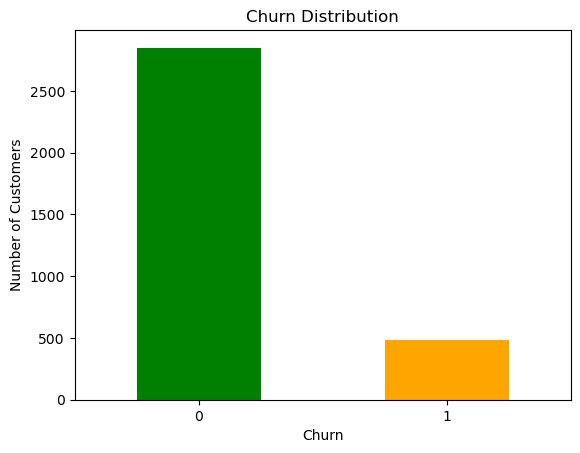

In [37]:
df['churn'].value_counts().plot(kind='bar', title='Churn Distribution', color=['green', 'orange'])
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

This data is imbalanced, it shows only 14% churned. The majority are not churning. This highlights the need to handle imbalance during modelling

### BUSINESS ANALYSIS

In this section, we are going to look at the top reason why a cutomer is likely to churn and the churning rate. This analysis will help us create retention strategies

__Top Five(5) Churn Reason__

Analyse top five factors for customer churn. We will first analyze how strongly the features are correlated to the target

In [38]:
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international_plan,voice_mail_plan
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,0,1,0


In [43]:
# find features with most correlations 

df['churn'] = df['churn'].astype(int)

# Calculate correlation of numeric features with churn
correlations = df.corr(numeric_only=True)['churn'].drop('churn')

print(correlations.sort_values(ascending=False).head())

international_plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
Name: churn, dtype: float64


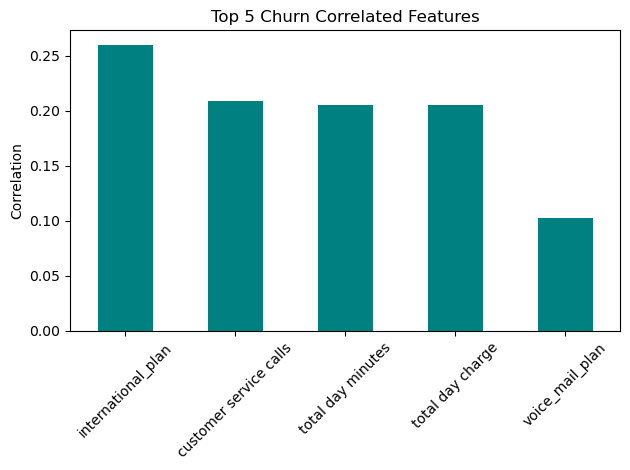

In [46]:
#plotting
most_corr = df.corr(numeric_only=True)['churn'].drop('churn').abs().sort_values(ascending=False)
most_corr.head(5).plot(kind='bar', color='teal')
plt.title('Top 5 Churn Correlated Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)  
plt.tight_layout()      
plt.show()

This graph shows the customers who are most likely to churn. Customers with international plan will churn due to high call rate charge. Customers who call the support center frequently can be due to user challenges or dissatisfaction of the products and services offered. Next we can analyse some of the features individually.

__Churning rate in International plans__

In [48]:
#calculate churning rate in international call

international_churn = df.groupby('international_plan')['churn'].mean()
print(international_churn)

international_plan
0    0.114950
1    0.424149
Name: churn, dtype: float64


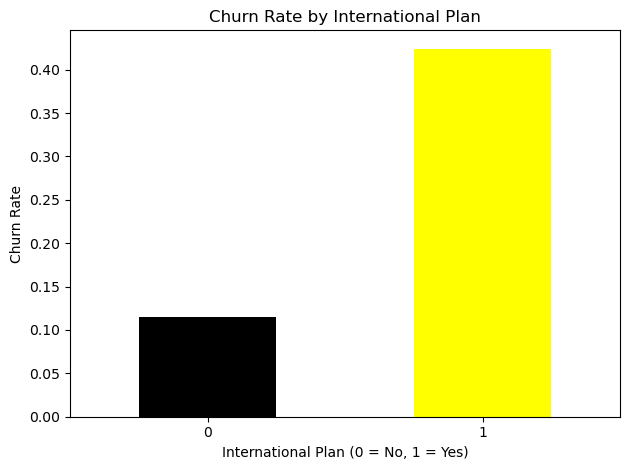

In [49]:
international_churn.plot(kind='bar', color=['black', 'yellow'])

plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This shows that customers subscribed to international plans have 42% chance for churning against 11% of those who do not have a plan. This can be explained by high call rates or customer experiencing roaming challenges

__Churn Rate by Time of Day__

Higher call usage during the day or evening is linked to increased churn, suggesting that frequent users may be more likely to leave.This analysis helps us check when customers are more available to make calls

In [53]:
# Group by churn and calculate mean for total day & eve minutes
time_by_churn = df.groupby('churn')[['total day minutes', 'total eve minutes']].mean()
time_by_churn

,total day minutes,total eve minutes
churn,,
0,175.175754,199.043298
1,206.914079,212.410145


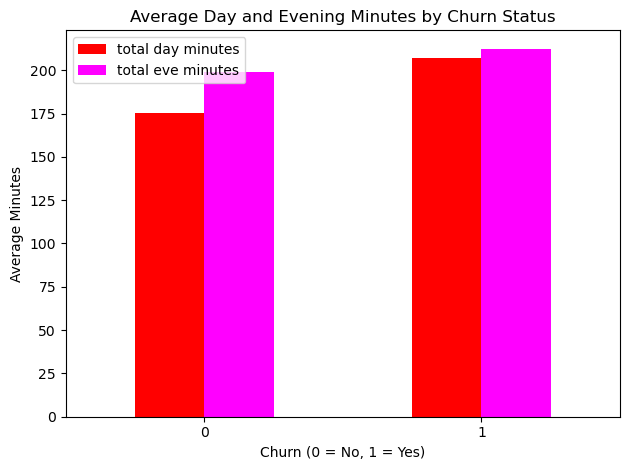

In [54]:
# Plot as side-by-side bars
time_by_churn.plot(kind='bar', color=['red', 'magenta'])

plt.title('Average Day and Evening Minutes by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Minutes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This graph shows that customers utilize more minutes in the evening compared to daytime. This can be explained by customers are more available to make calls during that time due to work. The churning rate is higher for high usage customers during both day and evening. The high usage customers can leave due to better offers or pricing by competitors

### MODELLING

In this project we are going to use predictive models to perform classification problem. We will begin with Logistic Regression as a baseline model due to its simplicity and interpretability. We will then refine our predictions using a Decision Tree model, which captures complex patterns in customer behavior more effectively, leading to improved accuracy and performance in churn prediction.

1. __Logistic Regression Analysis__

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score

In [68]:
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international_plan,voice_mail_plan
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,0,1,0


In [76]:
X.var()

account length            1585.800121
number vmail messages      187.371347
total day minutes         2966.696487
total day calls            402.768141
total day charge            85.737128
total eve minutes         2571.894016
total eve calls            396.910999
total eve charge            18.581856
total night minutes       2557.714002
total night calls          382.930472
total night charge           5.179597
total intl minutes           7.794368
total intl calls             6.057576
total intl charge            0.568173
customer service calls       1.730517
international_plan           0.087544
voice_mail_plan              0.200165
dtype: float64

In [77]:
# defining x and y
# dropping the charge columns too
# Drop unnecessary columns
y = churn_df['churn']
X = churn_df.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan', 'total day charge', 'total eve charge', 'total night charge', 'churn'], axis=1)


In [125]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.preprocessing import StandardScaler
#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
#Handling imbalance using class weight, training and fitting

model = LogisticRegression(class_weight="balanced",max_iter= 2000 ,random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [89]:
#Evaluating the model

y_pred = model.predict(X_test_scaled) 
y_proba = model.predict_proba(X_test_scaled)[:, 1] 

# Evaluate
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       566
           1       0.39      0.77      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667

ROC-AUC: 0.8349893293216247


__Interpratation__

0 means customers did not churn
1 means customers churned

**Precision**- 95% of customers didnot churn, while 39% of the prediction did actually churn

**Recall** - The model was able to identify 79% of non_churners and 77% of churners

**Accuracy** - this shows 78% of the prediction is correct 

**ROC-AUC** - At 83%, it shows the model perfectly identifies churning customers better from those who do not churn 

We can visualize confusion matrix to see how many true positive and false positives we have.

#### Confusion Matrix

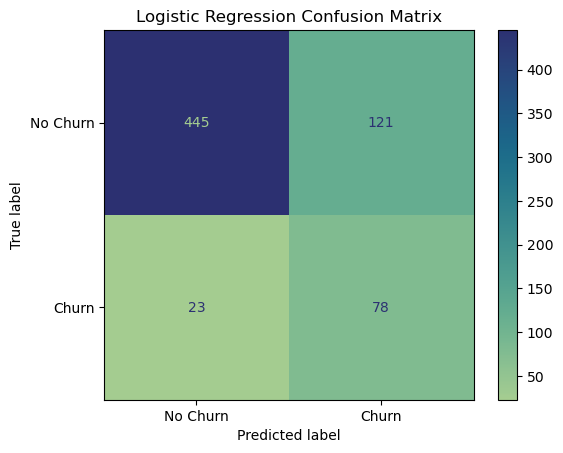

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

con_matrix = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=["No Churn", "Churn"])
disp.plot(cmap='crest')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

True Positive (TP) = correctly predicted churn (1)

False Positive (FP) = predicted churn (1) but it wasn’t (actually 0)

False Negative (FN) = predicted not churn (0) but it was (actually 1)

True Negative (TN) = correctly predicted not churn (0)

* TP = 78
* FP = 121
* FN = 23
* TN = 445

In [109]:
TP = 78
FP = 121
FN = 23
TN = 445

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)
# Calculate F1 score
f1score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1score:.4f}")

Precision: 0.3920
Recall: 0.7723
F1 Score: 0.5200


This model shows the precision for churners is really low, it failed to predict 61%. This means we can either improve the model and calculate again or use another model like decision trees to predict. We are going to use decision trees for modelling and make a comparison.

2. __Decision Trees__

In [105]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [102]:
churn_df_dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
churn_df_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [104]:
#predict model

y_pred_dt = churn_df_dt.predict(X_test)
y_probs_dt = churn_df_dt.predict_proba(X_test)[:, 1]

#Evaluating the model
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.76      0.76      0.76       101

    accuracy                           0.93       667
   macro avg       0.86      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667

ROC-AUC Score: 0.8599867053843194


__Interpratation__

0 means customers did not churn
1 means customers churned

**Precision**- The model accurately predicted 96% of customers didnot churn, while 76% of the prediction did actually churn

**Recall** - The model was able to correctly identify 96% of non_churners and 76% of churners

**Accuracy** - this shows 93% of the prediction is correct 

**ROC-AUC** - At 86%, it shows the model perfectly identifies churning customers better from those who do not churn 

We can visualize confusion matrix to see how many true positive and false positives we have.

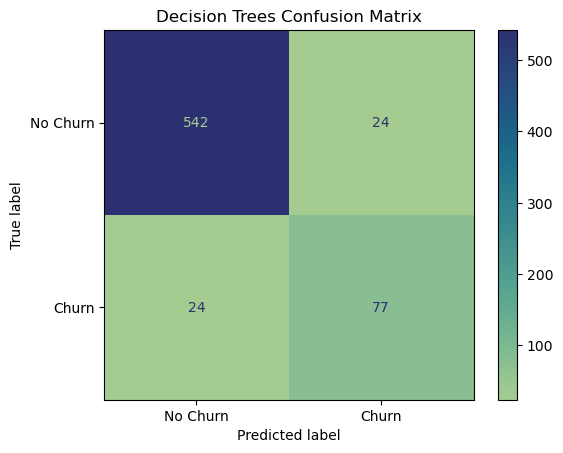

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate predictions
y_pred = churn_df_dt.predict(X_test)
con_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix_dt, display_labels=["No Churn", "Churn"])
disp.plot(cmap='crest')
plt.title("Decision Trees Confusion Matrix")
plt.show()

In [117]:
TP = 77
FP = 24
FN = 24
TN = 542

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)
# Calculate F1 score
f1score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1score:.4f}")

Precision: 0.7624
Recall: 0.7624
F1 Score: 0.7624


### COMPARATIVE ANALYSIS AND BUSINESS IMPLICATIONS

This section gives comparative analysis of the Logistic Regression and Decision Tree models for predicting customer churn in our company. It compares model performance across key metrics such as accuracy, precision, recall, F1 score, and ROC-AUC in both models and the business implications

In [123]:
#create a side by side table
# Create a dictionary with model metrics
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'],
    'Logistic Regression': [0.78, 0.39, 0.77, 0.52, 0.835],
    'Decision Tree': [0.93, 0.76, 0.76, 0.76, 0.860]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(data)

# Display the table
comparison_df

,Metric,Logistic Regression,Decision Tree
0,Accuracy,0.780,0.93
1,Precision,0.390,0.76
2,Recall,0.770,0.76
3,F1 Score,0.520,0.76
4,ROC-AUC,0.835,0.86


The two models used in this analysis, ie Logistic Regression and Decision Tree,are predictive tools that help our telecom company determine the likelihood of customer churn based on usage behavior. 

Below is the models' perfomace analysis and actionable insights:

**Accuracy**
Accuracy metric is the overall reliability on the models's prediction. Decision tree(DT) gives 93% accuracy of prediction, compared to  78% of Logistic Regression(LR). 

The high accuracy score ensures that the company focuses resources and retention efforts to customers who are most likely to churn.This helps in allocating resources efficiently

**Precision**
Precision metric is the percentage of correctly predicted churners out of all predicted churners.Decision tree precision shows it accurately predicted 76% out of all the customers that churned.76% of the customers actually unsubscribed. Logistic regression predicted 39%, indicating few customers are churning when its otherwise.

High precision ensures there is enough resource allocation and fewer customers who are staying are targetted. Retention efforts are directed to the correct group of people.

**Recall**

Recall is the percentage of actual churners correctly predicted by the model.Both models performed well in this score at 76%. This shows that most churners were identified. However with 39% of precisin score for LR shows that a high number of non- churners were incorrectly identified as churners.

Precision and recall should balance to help ensure enough resources are allocated to the trageted group

**F1 Score**

This is the balance between recall and precision.Fi Score for logistic regression at 52% showed a class imbalance between precision and recall while decision tree at 76% shows a very good balance.

It allows the company to allocate resources more efficiently focusing on customers who are actually at risk. An imbalancemeans failing identify and retain actual churning customers




### RECOMMENDATIONS

**Customer segmentation**
Use Decision Trees to identify churners, carry out customer segmentation to curate targeted campaigns for each group, give personalised offers based on usage behaviour.

**Customer service Training**
Calls to support centre indicate that customers are not satisfied with the products and services offered or are experiencing user challenges. Training frontline team ensures customers meet knowledgeble team ready to handle their queries and even cross-sell and up-sell to the customers.

**Time-based offers**
Higher call usage during the day or evening is linked to increased churn.Curating time based offers, ensures that customers get the most from their daily or hourly spend. example include having hourly, daily bundle plans, free calls from midnight, affordable international bundles offers.

**Loyalty Programs**
Have loyalty programs to ensure consistent use of services like bonus airtimes, redeemable points,credit services with low interest pegged on line usage


### CONCLUSION

The Decision Tree model is the best choice for predicting churn in our company based on its accuracy, precision, recall and F1 matrices. The company can more accurately identify customers at risk of leaving, enabling us to proactively implement targeted retention strategies.

The company needs to monitor and evaluate churning patterns to improve the models accuracy. This helps the company to keep up with the trends.

Predictive analysis ensures the model maximizes evenue while minimizing costs